In [10]:
import sys
sys.path.append('..')
from agrid import *
from agrid.acc import download

In [11]:
ant = Grid(crs=3031, res = [10*km, 10*km], 
           left = -3100*km, 
           up=3100*km, 
           right = 3100*km, 
           down = -3100*km)

In [24]:
url_raster = '''
    https://www.naturalearthdata.com/http//
    www.naturalearthdata.com/download/50m/
    raster/HYP_50M_SR_W.zip'''

raster_file = '../../data/ne/HYP_50M_SR_W/HYP_50M_SR_W.tif'

File ../../data/ne/HYP_50M_SR_W/HYP_50M_SR_W.tif already exists.
Saved:  ../../data/ne/HYP_50M_SR_W/HYP_50M_SR_W.tif


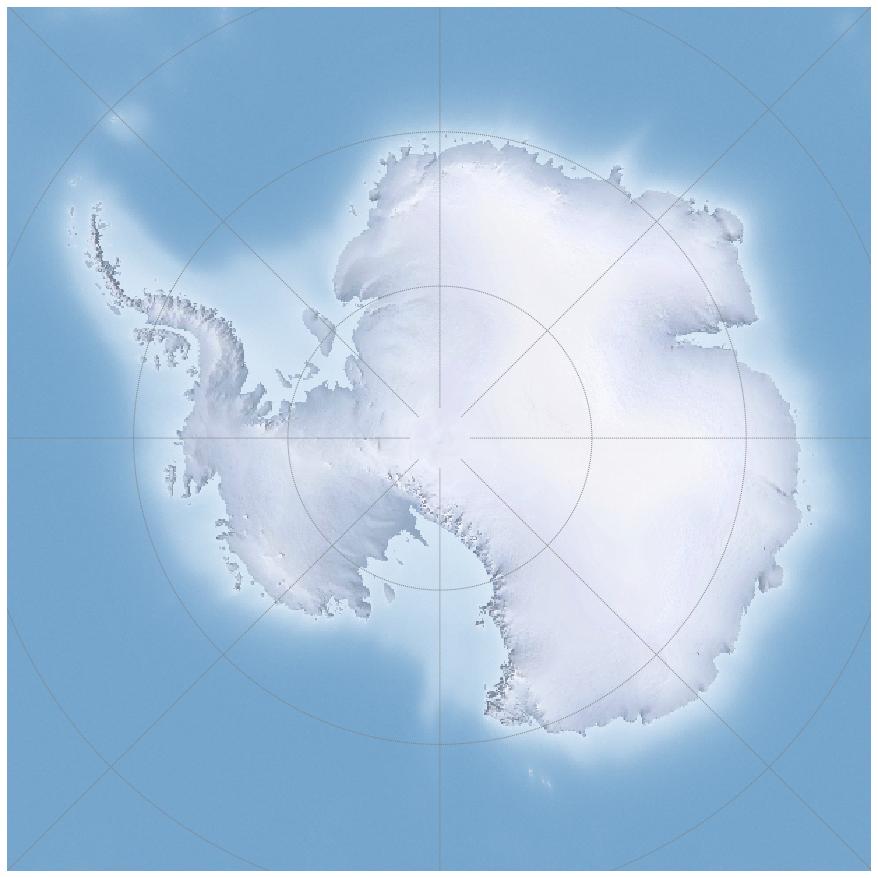

In [25]:
download(url_raster, raster_file)

ant.ds['RGB_RASTER'] = (('Y', 'X', 'RGB'), 
                ant.read_raster(raster_file,sub_sampling=3) )

ant.map_grid('RGB_RASTER', draw_coast=False)

In [26]:
vector_url = '''https://www.naturalearthdata.com/http//
    www.naturalearthdata.com/download/10m/physical/ne_10m_land.zip'''

vector_file = '../data/ne/ne_10m_land.zip'

download(vector_url, vector_file, 
        meta_dict={'Project' : 'Start using agrid', 'Dataset' : 'World vector'})

File ../data/ne/ne_10m_land.zip already exists.
Saved:  ../data/ne/ne_10m_land.zip


{'Project': 'Start using agrid', 'Dataset': 'World vector'}

In [28]:
ant.ds['LAND'] = (('Y', 'X'), 
                ant.assign_shape('../data/ne/ne_10m_land.shp', 'scalerank', 
                                burn_val=1, map_to_int=False) )
ant.map_grid('LAND', draw_coast=False, cmap='Greens_r')

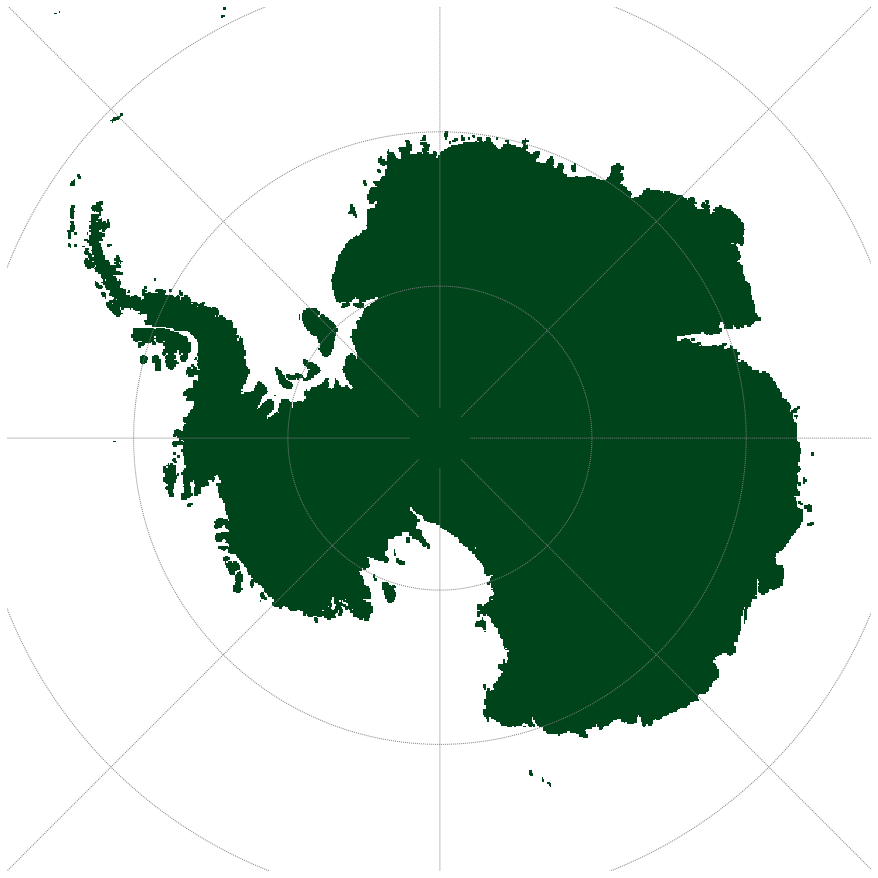

In [33]:
ant.map_grid('LAND', draw_coast=False, cmap='Greens_r')